In [1]:
import pandas as pd

#### Data description
1. No missing values
2. In kW of each 15 min. Divided by 4 get kWh.
3. Each column represent one client. Some were created after 2011, so there might be zeros.
4. Mind time change

https://archive.ics.uci.edu/dataset/321/electricityloaddiagrams20112014

In [2]:
data = pd.read_csv('electricity.txt', delimiter=';', parse_dates=[0], low_memory=False)
data.rename(columns={'Unnamed: 0': 'Time'}, inplace=True)
data.set_index('Time', inplace=True)
data.index = pd.to_datetime(data.index)
data = data.applymap(lambda x: float(str(x).replace(',', '')) if isinstance(x, str) else x)
data.head()

/var/folders/kg/q3b1npp54mn6cwl_d28bdvnh0000gn/T/ipykernel_7643/2287241674.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: float(str(x).replace(',', '')) if isinstance(x, str) else x)


,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
Time,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
Time,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:15:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2011-01-01 00:30:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2011-01-01 00:45:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2011-01-01 01:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2011-01-01 01:15:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 23:00:00,2.538071e+14,2.204836e+14,1.737619e+14,1.504065e+14,8.536585e+14,3.035714e+14,1.130582e+14,2.828283e+14,6.818182e+14,7.204301e+14,...,2.769450e+14,28200.0,1.616034e+14,1.363636e+14,2.998696e+13,5.851375e+14,6.971027e+14,1.769616e+14,6.510264e+14,7.621622e+14
2014-12-31 23:15:00,2.538071e+14,2.133713e+14,1.737619e+14,1.666667e+14,8.170732e+14,3.244048e+14,1.130582e+14,2.525253e+14,6.468531e+14,7.204301e+14,...,2.798001e+14,28300.0,1.569620e+14,1.340909e+14,2.998696e+13,9.947338e+14,6.716418e+14,1.686144e+14,6.693548e+14,6.702703e+13
2014-12-31 23:30:00,2.538071e+14,2.062589e+14,1.737619e+14,1.626016e+13,8.292683e+14,3.184524e+14,1.017524e+14,2.424242e+14,6.118881e+14,7.419355e+14,...,2.847966e+14,27800.0,1.556962e+14,1.318182e+14,2.737940e+14,9.362200e+13,6.707638e+14,1.535893e+14,6.700880e+14,6.864865e+14


In [4]:
# For data like electricity consumption, there is siginificant daily and seasonal usage pattern.
# So we might need to look at the data at different frequencys.
hourly_data = data.resample('h').sum()
hourly_data_since_12 = hourly_data[(hourly_data.index >= '2012-01-01') & (hourly_data.index < '2015-01-01')]

daily_data = data.resample('D').sum()
# Now I decide just drop all the data before 2012
daily_data_since_12 = daily_data[(daily_data.index >= '2012-01-01') & (daily_data.index < '2015-01-01')]

monthly_data_since_12 = daily_data_since_12.resample('M').sum()
monthly_data_since_12 = monthly_data_since_12[monthly_data_since_12.index < '2015-01-31']

/var/folders/kg/q3b1npp54mn6cwl_d28bdvnh0000gn/T/ipykernel_7643/545736406.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data_since_12 = daily_data_since_12.resample('M').sum()


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
import plotly.express as px

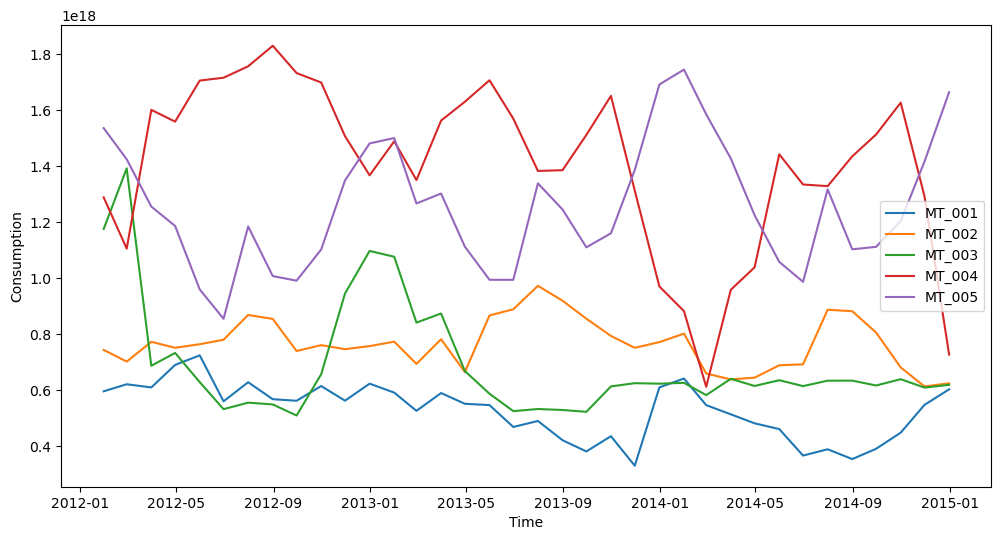

In [12]:
# 1. Plot the electricity consumption over time for a few clients.

df = monthly_data_since_12

client_to_plot = df.columns[:5]

plt.figure(figsize=(12, 6))
for client in client_to_plot:
    plt.plot(df.index, df[client], label=client)
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.legend()
plt.show()

In [ ]:
# The data have different patterns for different consumers. Therefore maybe first classify then aggregate.

In [7]:
# Use the whole dataset to cluster. 
from sklearn.preprocessing import StandardScaler
data_since_12 = data[data.index > '2012-01-01']
consumer_data = data_since_12.T

scaler = StandardScaler()
normalized_data = scaler.fit_transform(consumer_data)

100%|██████████| 10/10 [00:07<00:00,  1.27it/s]


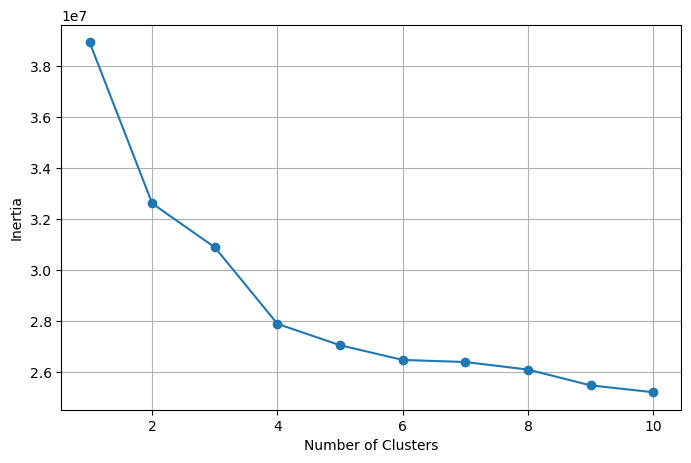

In [8]:
from tqdm import *
inertia = []
for k in tqdm(range(1, 11)):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [9]:
# The elbow is not very obvious in the graph, for clarity I guess I'll give it 5 groups.
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(normalized_data) 

consumer_data['Cluster'] = clusters

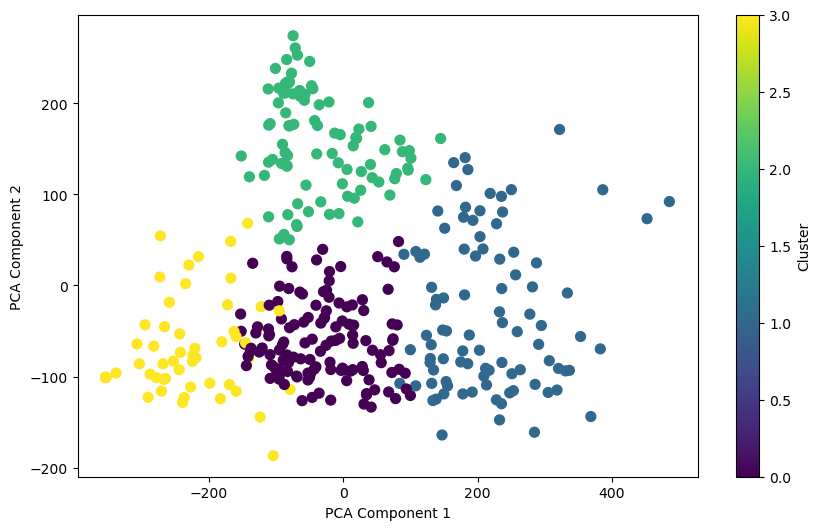

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_data)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [11]:
clusters_counts = consumer_data['Cluster'].value_counts().sort_index()
clusters_counts

Cluster
0    130
1     93
2     92
3     55
Name: count, dtype: int64

In [12]:
target = consumer_data['Cluster']

In [16]:
# Now try to understand consumer behaviour for each cluster
## 15-min's frequency is too high for statistical model i guess? Starting by daily data.
target_df = target.reset_index()
target_df.columns = ['consumer', 'cluster']
data_melted = hourly_data_since_12.melt(ignore_index=False).reset_index()
data_melted.columns = ['time', 'consumer', 'consumption']
data_with_cluster = pd.merge(data_melted, target_df, on='consumer')

In [17]:
data_agg = data_with_cluster.groupby(['cluster', 'time']).sum().reset_index()
data_agg_pivot = data_agg.pivot(index='time', columns='cluster', values='consumption')
data_agg_pivot.head()

cluster,0,1,2,3
time,,,,
2012-01-01 00:00:00,1.145077e+17,1.125080e+17,1.772093e+17,8.779628e+15
2012-01-01 01:00:00,1.426715e+17,1.338765e+17,1.796054e+17,1.009013e+16
2012-01-01 02:00:00,1.383707e+17,1.289111e+17,1.772971e+17,1.189987e+16
2012-01-01 03:00:00,1.314110e+17,1.331608e+17,1.840901e+17,1.143953e+16
2012-01-01 04:00:00,1.273598e+17,1.353437e+17,1.920048e+17,9.742502e+15


In [18]:
# data_agg_pivot.to_csv('daily_clusters.csv')
# data_agg_pivot.to_csv('hourly_clusters.csv')

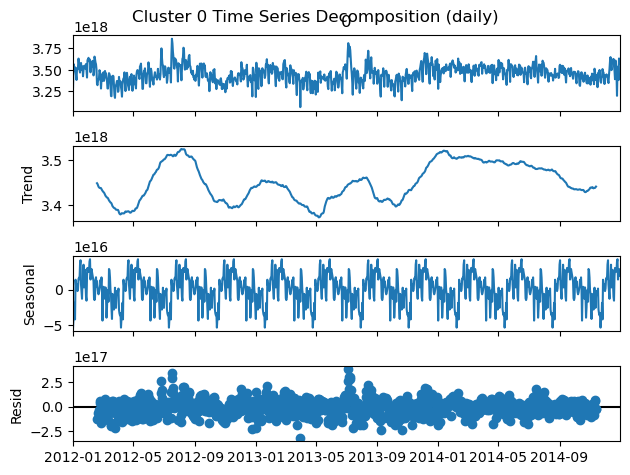

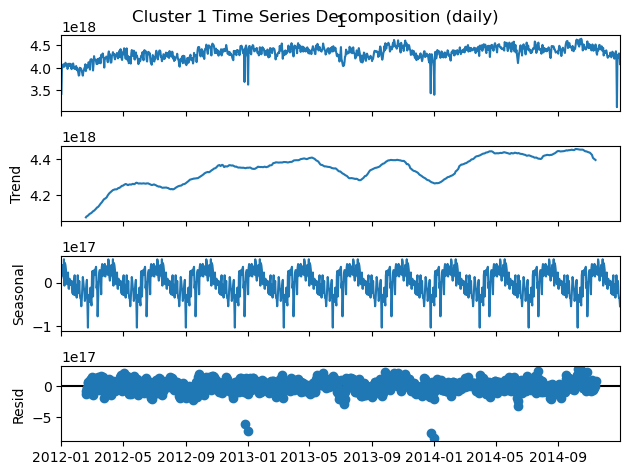

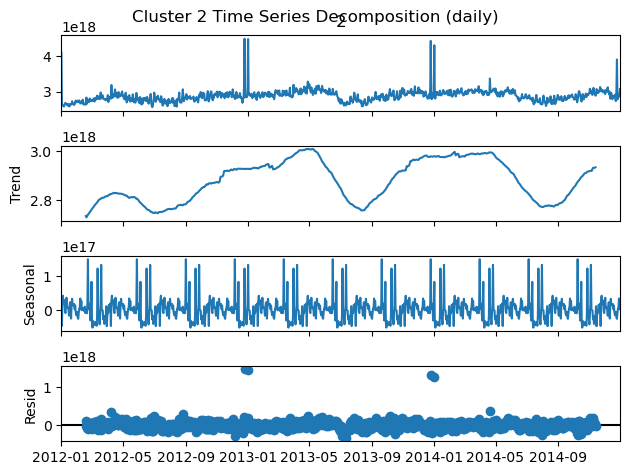

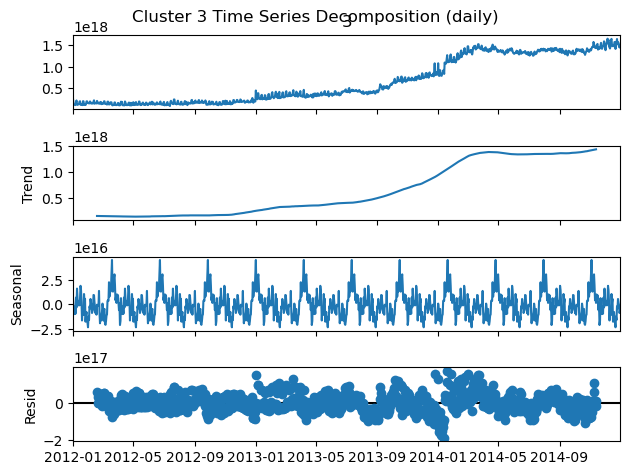

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

for cluster in data_agg_pivot.columns:
    series = data_agg_pivot[cluster]
    decomposition = seasonal_decompose(series, model='sdditive', period=96)
    decomposition.plot()
    plt.suptitle(f'Cluster {cluster} Time Series Decomposition (daily)')
    plt.show()

R-squared: -1.136264744536383


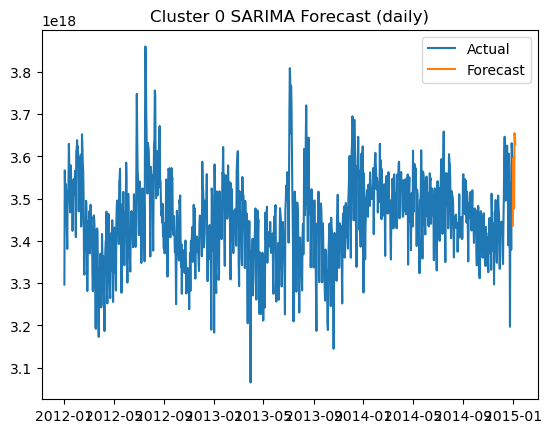

R-squared: -0.19282627056722323


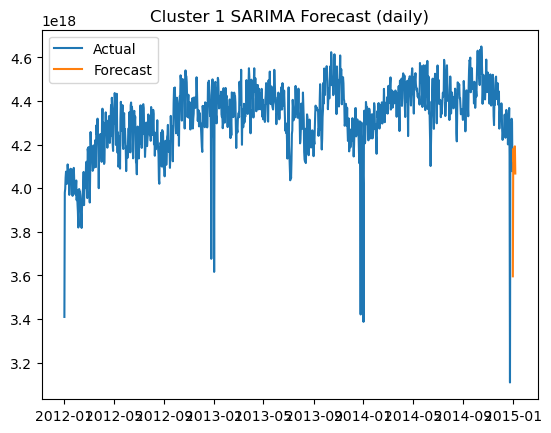

R-squared: -0.46100668342212203


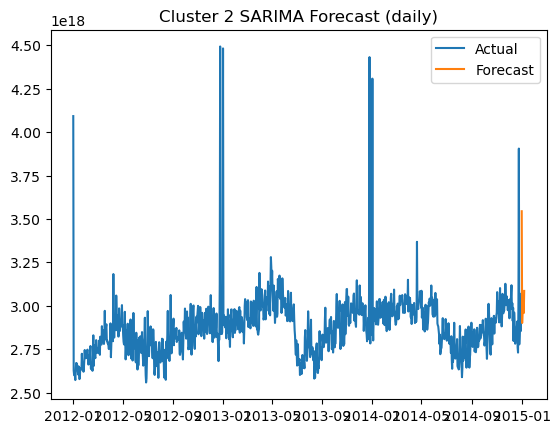

R-squared: 0.9958012727716034


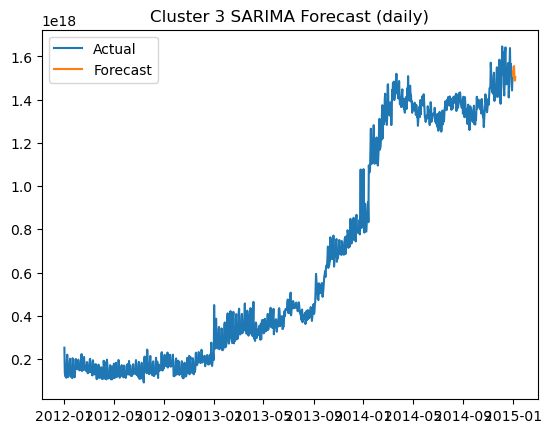

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore", category=Warning)
import numpy as np 

for cluster in data_agg_pivot.columns:
    series = data_agg_pivot[cluster]
    model = SARIMAX(series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
    model_fit = model.fit(disp=False)
    forecast = model_fit.forecast(steps=7)
    
    # Also report R-squared
    residuals = model_fit.resid
    residual_variance = np.var(residuals)
    data_variance = np.var(series)
    r_squared = 1 - (residual_variance / data_variance)
    print(f"R-squared: {r_squared}")

    plt.plot(series, label='Actual')
    plt.plot(forecast, label='Forecast')
    plt.title(f'Cluster {cluster} SARIMA Forecast (daily)')
    plt.legend()
    plt.show()

In [22]:
# cluster 3 has relatively better results, whereas other clusters have vey bad ones.
# posiible reasons: stationality of data, choice of parameters, etc.... 

18:30:10 - cmdstanpy - INFO - Chain [1] start processing
18:30:10 - cmdstanpy - INFO - Chain [1] done processing


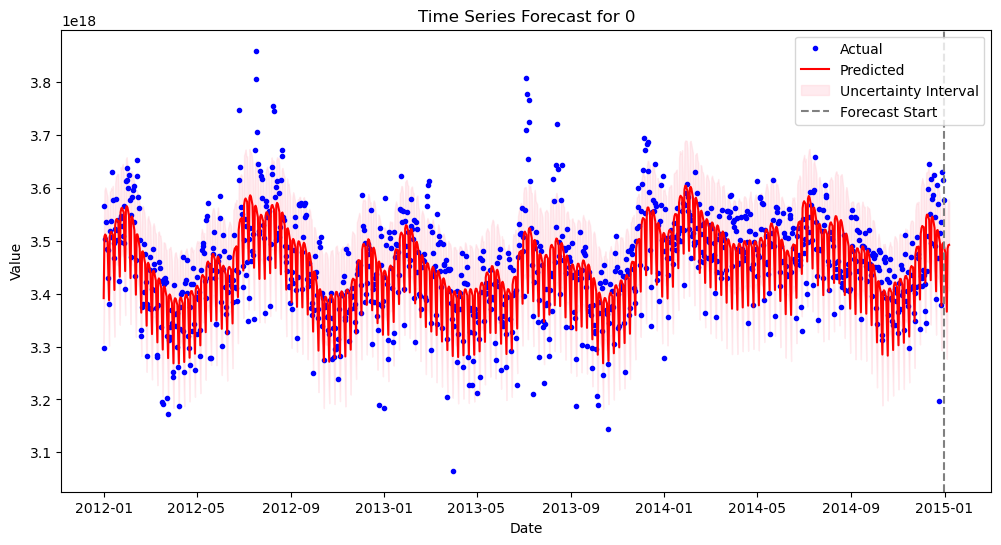

18:30:10 - cmdstanpy - INFO - Chain [1] start processing
18:30:11 - cmdstanpy - INFO - Chain [1] done processing


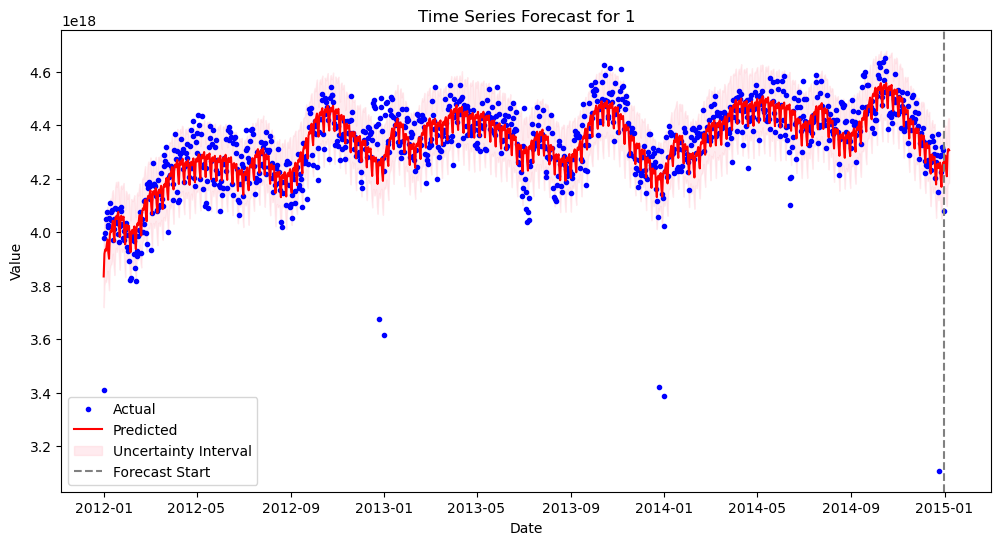

18:30:11 - cmdstanpy - INFO - Chain [1] start processing
18:30:11 - cmdstanpy - INFO - Chain [1] done processing


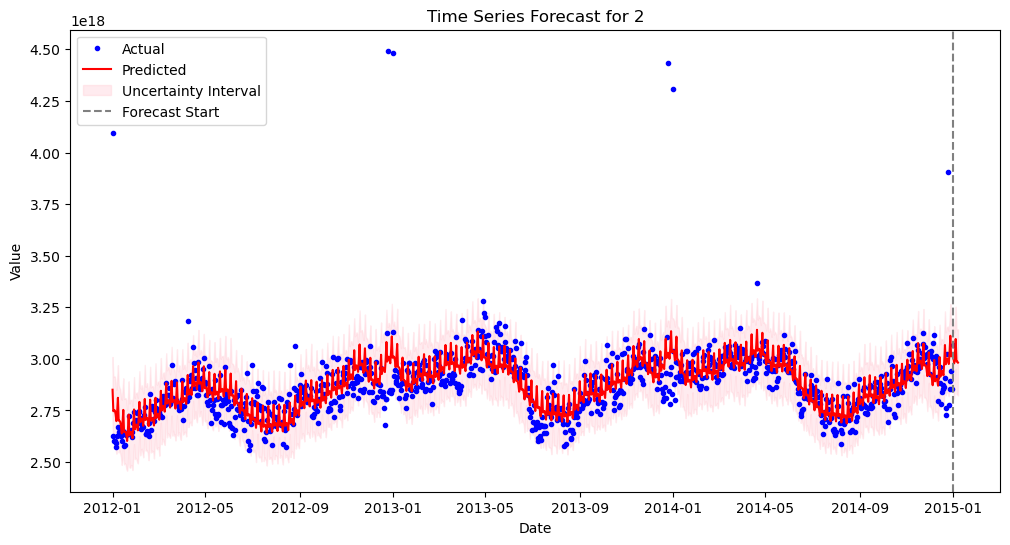

18:30:11 - cmdstanpy - INFO - Chain [1] start processing
18:30:11 - cmdstanpy - INFO - Chain [1] done processing


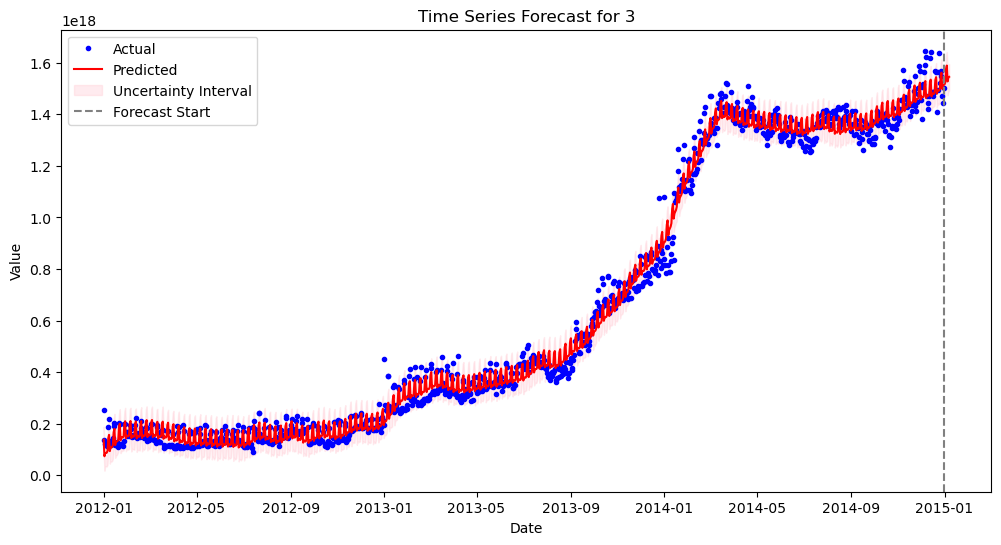

  Cluster           MSE          RMSE           MAE      MAPE
0       0  4.428088e+33  6.654388e+16  5.058114e+16  1.462976
1       1  8.790780e+33  9.375916e+16  6.259264e+16  1.475465
2       2  1.515806e+34  1.231181e+17  6.600328e+16  2.223232
3       3  1.693245e+33  4.114905e+16  3.013331e+16  7.168122


In [24]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 准备数据函数
def prepare_data(series):
    series = series.reset_index()
    series.columns = ['ds', 'y']
    return series

# 计算 MAPE 函数
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 初始化结果 DataFrame
forecast_results = pd.DataFrame(columns=['Cluster', 'MSE', 'RMSE', 'MAE', 'MAPE'])

# 遍历每个聚类
for cluster in data_agg_pivot.columns:
    series = prepare_data(data_agg_pivot[cluster])
    
    # 创建 Prophet 模型
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False
    )
    
    # 拟合模型
    model.fit(series)
    
    # 生成未来 7 天的时间戳
    future = model.make_future_dataframe(periods=7)
    
    # 进行预测
    forecast = model.predict(future)
    
    # 合并真实值和预测值
    results = series.copy()
    results = results.merge(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds', how='outer')
    
    # 计算评价指标（仅针对历史数据）
    historical_results = results.dropna(subset=['y'])  # 仅使用历史数据计算指标
    mse = mean_squared_error(historical_results['y'], historical_results['yhat'])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(historical_results['y'], historical_results['yhat'])
    mape = mean_absolute_percentage_error(historical_results['y'], historical_results['yhat'])
    
    # 存储结果
    new_result = pd.DataFrame({
        'Cluster': [cluster],
        'MSE': [mse],
        'RMSE': [rmse],
        'MAE': [mae],
        'MAPE': [mape]
    })
    forecast_results = pd.concat([forecast_results, new_result], ignore_index=True)
    
    # 可视化预测结果
    plt.figure(figsize=(12, 6))
    plt.plot(results['ds'], results['y'], 'b.', label='Actual')  # 实际值
    plt.plot(results['ds'], results['yhat'], 'r-', label='Predicted')  # 预测值
    plt.fill_between(results['ds'], results['yhat_lower'], results['yhat_upper'], color='pink', alpha=0.3, label='Uncertainty Interval')  # 置信区间
    plt.axvline(x=series['ds'].max(), color='gray', linestyle='--', label='Forecast Start')  # 预测起始线
    plt.title(f'Time Series Forecast for {cluster}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# 打印结果
print(forecast_results)